In [1]:
from math import pi,sin,cos,tan,sqrt,log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
z0=15*10**(-2)#m
z=22*10**(-2)#m
d=1*10**(-2)#m

Menit 15

In [3]:
Data1 = pd.read_csv('./Data/menit15.csv')
zeta_1 = Data1["zeta"]*10**(-2)#m
delta_1 = Data1["delta"]*10**(-2)#m
i_1 = np.arange(1,int(len(Data1))+1,1)

In [4]:
yi_1 = (zeta_1 * z0)/(z0 + d + z)
dndy_1 = delta_1/(z*d)
lndndy_1 = np.log(dndy_1)

/home/imanrahmanri/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
ih=np.argmax(dndy_1)
h1=yi_1[ih]
h1

/home/imanrahmanri/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


0.016973684210526314

Text(0.5,1,'menit 15')

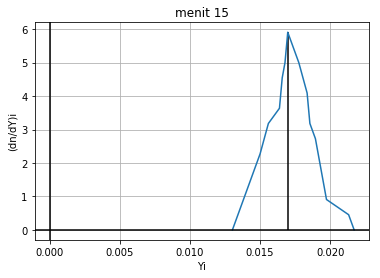

In [6]:
plt.plot(yi_1,dndy_1)
plt.xlabel("Yi")
plt.ylabel("(dn/dY)i")
plt.grid()
plt.vlines(x=yi_1[ih] , ymin=0 , ymax=dndy_1[ih])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("menit 15")

In [7]:
hyi2_1=(h1-yi_1)**2
data1_mod={"i":i_1,"delta_i":delta_1,"zeta_i":zeta_1,"Yi":yi_1,"(dn/dy)i":dndy_1,"(h-yi)^2":hyi2_1,"Ln(dn/dY)i":lndndy_1}
data1_mod=pd.DataFrame(data1_mod,columns=["i","delta_i","zeta_i","Yi","(dn/dy)i","(h-yi)^2","Ln(dn/dY)i"])
data1_mod

,i,delta_i,zeta_i,Yi,(dn/dy)i,(h-yi)^2,Ln(dn/dY)i
0,1,0.0000,0.0550,0.021711,0.000000,2.243767e-05,-inf
1,2,0.0010,0.0540,0.021316,0.454545,1.885388e-05,-0.788457
2,3,0.0015,0.0520,0.020526,0.681818,1.262119e-05,-0.382992
3,4,0.0020,0.0500,0.019737,0.909091,7.635042e-06,-0.095310
4,5,0.0030,0.0495,0.019539,1.363636,6.583276e-06,0.310155
5,6,0.0040,0.0490,0.019342,1.818182,5.609418e-06,0.597837
6,7,0.0060,0.0480,0.018947,2.727273,3.895429e-06,1.003302
7,8,0.0070,0.0470,0.018553,3.181818,2.493075e-06,1.157453
8,9,0.0090,0.0465,0.018355,4.090909,1.908760e-06,1.408767
9,10,0.0110,0.0450,0.017763,5.000000,6.232687e-07,1.609438


In [8]:
x=np.array(hyi2_1)
x=np.delete(x, [0,19])
x=x.reshape(-1,1)
y=np.array(lndndy_1)
y=np.delete(y, [0,19])
y=y.reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
c=model.intercept_
m=model.coef_
r2=model.score(x, y)
delta_m=m*sqrt(1-r2)
y_pred=model.predict(x)

In [9]:
print(c,m,r2,delta_m)

[1.48550662] [[-144078.63840194]] 0.923037176819616 [[-39970.54691435]]


Text(0.5,1,'menit 15')

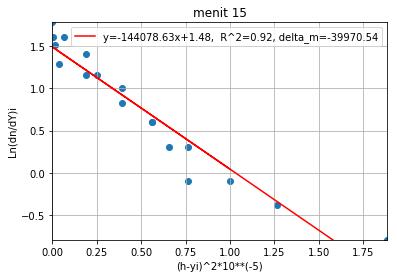

In [10]:
plt.scatter(x*10**(5),y)
plt.plot(x*10**(5),y_pred,'r',label='y=-144078.63x+1.48,  R^2=0.92, delta_m=-39970.54')
plt.legend()
plt.xlabel("(h-yi)^2*10**(-5)")
plt.ylabel("Ln(dn/dY)i")
plt.xlim(min(x)*10**(5),max(x)*10**(5))
plt.ylim(min(y),max(y))
plt.grid(True)
plt.title("menit 15")

In [11]:
D_1 = - 1/(4*m*15*60)
deltaD_1 = - 1/(4 * m**2 * 15 * 60) * delta_m
print(D_1, deltaD_1)

[[1.92795949e-09]] [[5.3485788e-10]]


Menit 30

In [12]:
Data2 = pd.read_csv('./Data/menit30.csv')
zeta_2 = Data2["zeta"]*10**(-2)#m
delta_2 = Data2["delta"]*10**(-2)#m
i_2 = np.arange(1,int(len(Data2))+1,1)

In [13]:
yi_2 = (zeta_2 * z0)/(z0 + d + z)
dndy_2 = delta_2/(z*d)
lndndy_2 = np.log(dndy_2)

/home/imanrahmanri/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
ih=np.argmax(dndy_2)
h2=yi_2[ih]
h2

/home/imanrahmanri/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


0.015789473684210527

Text(0.5,1,'menit 30')

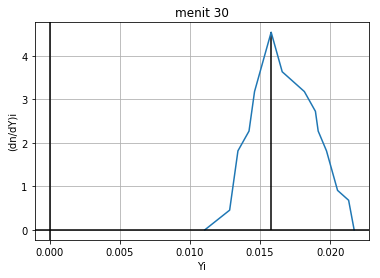

In [15]:
plt.plot(yi_2,dndy_2)
plt.xlabel("Yi")
plt.ylabel("(dn/dY)i")
plt.grid()
plt.vlines(x=yi_2[ih] , ymin=0 , ymax=dndy_2[ih])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("menit 30")

In [16]:
hyi2_2=(h2-yi_2)**2
data2_mod={"i":i_2,"delta_i":delta_2,"zeta_i":zeta_2,"Yi":yi_2,"(dn/dy)i":dndy_2,"(h-yi)^2":hyi2_2,"Ln(dn/dY)i":lndndy_2}
data2_mod=pd.DataFrame(data2_mod,columns=["i","delta_i","zeta_i","Yi","(dn/dy)i","(h-yi)^2","Ln(dn/dY)i"])
data2_mod

,i,delta_i,zeta_i,Yi,(dn/dy)i,(h-yi)^2,Ln(dn/dY)i
0,1,0.0000,0.0550,0.021711,0.000000,3.505886e-05,-inf
1,2,0.0015,0.0540,0.021316,0.681818,3.054017e-05,-0.382992
2,3,0.0020,0.0520,0.020526,0.909091,2.243767e-05,-0.095310
3,4,0.0030,0.0510,0.020132,1.363636,1.885388e-05,0.310155
4,5,0.0040,0.0500,0.019737,1.818182,1.558172e-05,0.597837
5,6,0.0050,0.0485,0.019145,2.272727,1.125779e-05,0.820981
6,7,0.0060,0.0480,0.018947,2.727273,9.972299e-06,1.003302
7,8,0.0070,0.0460,0.018158,3.181818,5.609418e-06,1.157453
8,9,0.0075,0.0440,0.017368,3.409091,2.493075e-06,1.226446
9,10,0.0080,0.0420,0.016579,3.636364,6.232687e-07,1.290984


In [17]:
x=np.array(hyi2_2)
x=np.delete(x, [0,19])
x=x.reshape(-1,1)
y=np.array(lndndy_2)
y=np.delete(y, [0,19])
y=y.reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
c=model.intercept_
m=model.coef_
r2=model.score(x, y)
delta_m=m*sqrt(1-r2)
y_pred=model.predict(x)

In [18]:
print(c,m,r2,delta_m)

[1.18873855] [[-56538.09058639]] 0.5277508381970218 [[-38853.19477103]]


Text(0.5,1,'menit 30')

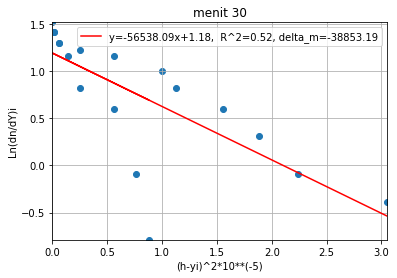

In [19]:
plt.scatter(x*10**(5),y)
plt.plot(x*10**(5),y_pred,'r',label='y=-56538.09x+1.18,  R^2=0.52, delta_m=-38853.19')
plt.legend()
plt.xlabel("(h-yi)^2*10**(-5)")
plt.ylabel("Ln(dn/dY)i")
plt.xlim(min(x)*10**(5),max(x)*10**(5))
plt.ylim(min(y),max(y))
plt.grid(True)
plt.title("menit 30")

In [20]:
D_2 = - 1/(4*m*30*60)
deltaD_2 = - 1/(4 * m**2 * 30*60) * delta_m
print(D_2, deltaD_2)

[[2.45655429e-09]] [[1.68815362e-09]]


Menit 45

In [21]:
Data3 = pd.read_csv('./Data/menit45.csv')
zeta_3 = Data3["zeta"]*10**(-2)#m
delta_3 = Data3["delta"]*10**(-2)#m
i_3 = np.arange(1,int(len(Data3))+1,1)

In [22]:
yi_3 = (zeta_3 * z0)/(z0 + d + z)
dndy_3 = delta_3/(z*d)
lndndy_3 = np.log(dndy_3)

/home/imanrahmanri/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
ih=np.argmax(dndy_3)
h3=yi_3[ih]
h3

/home/imanrahmanri/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


0.015789473684210527

Text(0.5,1,'menit 45')

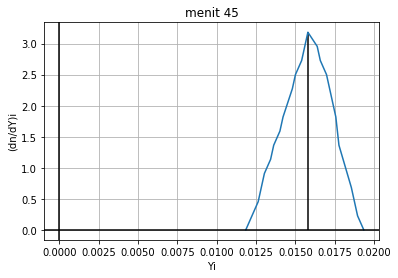

In [24]:
plt.plot(yi_3,dndy_3)
plt.xlabel("Yi")
plt.ylabel("(dn/dY)i")
plt.grid()
plt.vlines(x=yi_3[ih] , ymin=0 , ymax=dndy_3[ih])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("menit 45")

In [25]:
hyi2_3=(h3-yi_3)**2
data3_mod={"i":i_3,"delta_i":delta_3,"zeta_i":zeta_3,"Yi":yi_3,"(dn/dy)i":dndy_3,"(h-yi)^2":hyi2_3,"Ln(dn/dY)i":lndndy_3}
data3_mod=pd.DataFrame(data3_mod,columns=["i","delta_i","zeta_i","Yi","(dn/dy)i","(h-yi)^2","Ln(dn/dY)i"])
data3_mod

,i,delta_i,zeta_i,Yi,(dn/dy)i,(h-yi)^2,Ln(dn/dY)i
0,1,0.0000,0.0490,0.019342,0.000000,1.262119e-05,-inf
1,2,0.0005,0.0480,0.018947,0.227273,9.972299e-06,-1.481605
2,3,0.0010,0.0475,0.018750,0.454545,8.764716e-06,-0.788457
3,4,0.0015,0.0470,0.018553,0.681818,7.635042e-06,-0.382992
4,5,0.0030,0.0450,0.017763,1.363636,3.895429e-06,0.310155
5,6,0.0040,0.0445,0.017566,1.818182,3.155298e-06,0.597837
6,7,0.0055,0.0430,0.016974,2.500000,1.402355e-06,0.916291
7,8,0.0060,0.0420,0.016579,2.727273,6.232687e-07,1.003302
8,9,0.0065,0.0415,0.016382,2.954545,3.505886e-07,1.083345
9,10,0.0070,0.0400,0.015789,3.181818,0.000000e+00,1.157453


In [26]:
x=np.array(hyi2_3)
x=np.delete(x, [0,19])
x=x.reshape(-1,1)
y=np.array(lndndy_3)
y=np.delete(y, [0,19])
y=y.reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
c=model.intercept_
m=model.coef_
r2=model.score(x, y)
delta_m=m*sqrt(1-r2)
y_pred=model.predict(x)

In [27]:
print(c,m,r2,delta_m)

[1.14783551] [[-209316.19659184]] 0.9426750411166404 [[-50115.80499423]]


Text(0.5,1,'menit 45')

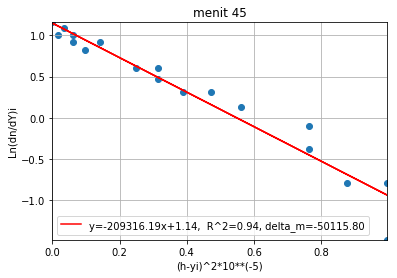

In [28]:
plt.scatter(x*10**(5),y)
plt.plot(x*10**(5),y_pred,'r',label='y=-209316.19x+1.14,  R^2=0.94, delta_m=-50115.80')
plt.legend()
plt.xlabel("(h-yi)^2*10**(-5)")
plt.ylabel("Ln(dn/dY)i")
plt.xlim(min(x)*10**(5),max(x)*10**(5))
plt.ylim(min(y),max(y))
plt.grid(True)
plt.title("menit 45")

In [29]:
D_3 = - 1/(4*m*45*60)
deltaD_3 = - 1/(4 * m**2 * 45*60) * delta_m
print(D_3, deltaD_3)

[[4.42357515e-10]] [[1.05912028e-10]]


Menit 60

In [30]:
Data4 = pd.read_csv('./Data/menit60.csv')
zeta_4 = Data4["zeta"]*10**(-2)#m
delta_4 = Data4["delta"]*10**(-2)#m
i_4 = np.arange(1,int(len(Data4))+1,1)

In [31]:
yi_4 = (zeta_4 * z0)/(z0 + d + z)
dndy_4 = delta_4/(z*d)
lndndy_4 = np.log(dndy_4)

/home/imanrahmanri/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
ih=np.argmax(dndy_4)
h4=yi_4[ih]
h4

/home/imanrahmanri/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


0.016578947368421054

Text(0.5,1,'menit 60')

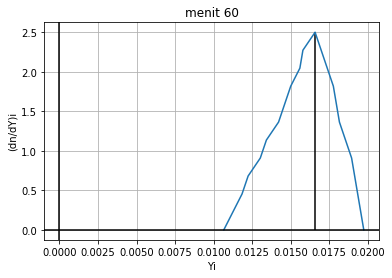

In [33]:
plt.plot(yi_4,dndy_4)
plt.xlabel("Yi")
plt.ylabel("(dn/dY)i")
plt.grid()
plt.vlines(x=yi_4[ih] , ymin=0 , ymax=dndy_4[ih])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("menit 60")

In [34]:
hyi2_4=(h4-yi_4)**2
data4_mod={"i":i_4,"delta_i":delta_4,"zeta_i":zeta_4,"Yi":yi_4,"(dn/dy)i":dndy_4,"(h-yi)^2":hyi2_4,"Ln(dn/dY)i":lndndy_4}
data4_mod=pd.DataFrame(data4_mod,columns=["i","delta_i","zeta_i","Yi","(dn/dy)i","(h-yi)^2","Ln(dn/dY)i"])
data4_mod

,i,delta_i,zeta_i,Yi,(dn/dy)i,(h-yi)^2,Ln(dn/dY)i
0,1,0.0000,0.0500,0.019737,0.000000,9.972299e-06,-inf
1,2,0.0005,0.0495,0.019539,0.227273,8.764716e-06,-1.481605
2,3,0.0010,0.0490,0.019342,0.454545,7.635042e-06,-0.788457
3,4,0.0020,0.0480,0.018947,0.909091,5.609418e-06,-0.095310
4,5,0.0025,0.0470,0.018553,1.136364,3.895429e-06,0.127833
5,6,0.0030,0.0460,0.018158,1.363636,2.493075e-06,0.310155
6,7,0.0040,0.0450,0.017763,1.818182,1.402355e-06,0.597837
7,8,0.0045,0.0440,0.017368,2.045455,6.232687e-07,0.715620
8,9,0.0050,0.0430,0.016974,2.272727,1.558172e-07,0.820981
9,10,0.0055,0.0420,0.016579,2.500000,0.000000e+00,0.916291


In [35]:
x=np.array(hyi2_4)
x=np.delete(x, [0,19])
x=x.reshape(-1,1)
y=np.array(lndndy_4)
y=np.delete(y, [0,19])
y=y.reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
c=model.intercept_
m=model.coef_
r2=model.score(x, y)
delta_m=m*sqrt(1-r2)
y_pred=model.predict(x)

In [36]:
print(c,m,r2,delta_m)

[0.60515744] [[-74029.02265966]] 0.5209645127187741 [[-51237.25557317]]


Text(0.5,1,'menit 60')

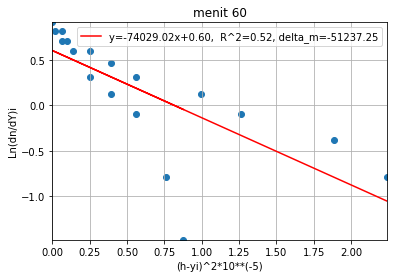

In [37]:
plt.scatter(x*10**(5),y)
plt.plot(x*10**(5),y_pred,'r',label='y=-74029.02x+0.60,  R^2=0.52, delta_m=-51237.25')
plt.legend()
plt.xlabel("(h-yi)^2*10**(-5)")
plt.ylabel("Ln(dn/dY)i")
plt.xlim(min(x)*10**(5),max(x)*10**(5))
plt.ylim(min(y),max(y))
plt.grid(True)
plt.title("menit 60")

In [38]:
D_4 = - 1/(4*m*60*60)
deltaD_4 = - 1/(4 * m**2 * 60*60) * delta_m
print(D_4, deltaD_4)

[[9.38070529e-10]] [[6.49261029e-10]]
